In [1]:
import spacy
%matplotlib inline

2022-05-11 14:40:28.754984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-11 14:40:28.755048: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
nlp = spacy.load('en_core_web_md')

In [3]:
import pandas as pd
import numpy as np

In [4]:
jd = pd.read_csv('jd.csv', usecols=[0,1])

In [5]:
jd

,title,desc
0,web developer,a leading ecommerce agency is looking to hire ...
1,software engineer,"software engineer c, c++, java, uml, xamp, agi..."
2,user experience developer,user experience developer our client requires ...
3,web developer,web developer our client is looking for experi...
4,c software developers,c developer belfast salary up to ****k pa our ...
...,...,...
5431,c++ software engineer rtos,real time software engineer with c++ skills re...
5432,software engineer,software engineer this is a fantastic permanen...
5433,c software developer,we are recruiting for our client who have deve...
5434,php software developer,php software developer glasgow eden scott s cl...


In [6]:
from collections import defaultdict
utitle = defaultdict(lambda : 0)
for i in range(5436):
    utitle[jd.iloc[i,0]] += 1
len(utitle)

1149

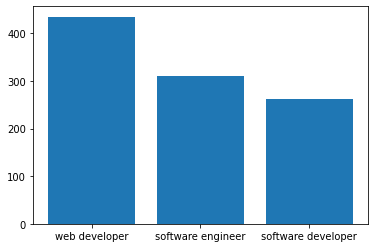

In [7]:
import operator
d = dict(sorted(utitle.items(), key=operator.itemgetter(1), reverse=True)[:3])

import matplotlib.pyplot as plt

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())

plt.show()

In [8]:
d

{'web developer': 435, 'software engineer': 310, 'software developer': 263}

In [9]:
doc = nlp(u'software-developer')
doc2 = nlp(u'web developer')

In [10]:
print(doc.similarity(doc2))
print(doc.similarity(nlp(u'systems developer')))
print(doc.similarity(nlp(u'software tester')))
print(doc.similarity(nlp(u'data scientist')))

0.7808359478223753
0.7674914712196389
0.6991741289969555
0.7798803130952474


In [12]:
(jd.iloc[0,1])

'a leading ecommerce agency is looking to hire a web developer to join their team of ecommerce developers. the role will involve working on different types of client and a candidate should have the ability to create and implement unique, engaging, and intuitive work to meet client requirements. requirements: 34 years of experience in web development **** or more years on ecommerce projects in an agency setting development skills in the following technologies: o asp.net and asp o vb and vb.net o sql server / tsql o com/dcom o xml, html o javascript knowledge of microsoft commerce server, any other ecommerce solutions if this sounds like a challenge that you are ready to take up, send in your cv now'